<a href="https://colab.research.google.com/github/Indranil3001/Indranil3001/blob/main/Data_Viz_final_GH1026152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hubertsidorowicz/football-players-stats-2024-2025")
path= path+"/players_data_light-2024_2025.csv"
print("Path to dataset files:", path)

100%|██████████| 1.09M/1.09M [00:00<00:00, 13.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hubertsidorowicz/football-players-stats-2024-2025/versions/24/players_data_light-2024_2025.csv


In [3]:
df=pd.read_csv(path)

df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Columns: 165 entries, Rk to AvgDist
dtypes: float64(61), int64(99), object(5)
memory usage: 3.4+ MB


(2734, 165)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,25.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,1,8,3,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,51,12,2,0,0,2,10,0,0,0,0,50,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,2,2.09,2,0,0,0,0,0,0,0.00,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,MF,Valencia,es La Liga,25.0,2000.0,1,0,31,0.3,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,0,2,3,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,14,18,77.8,222,48,0,0.0,0.0,0.0,0,1,0,0,2,14,4,0,0,0,2,4,0,0,0,0,14,1,1,0,1,0,1,100.0,0,1,0,1,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.00,24,0,4,4,16,0,24,2,1,50.0,0,0.0,10,28,10,0,0,0,1,1,11,3,0,0,0,0,0,0,2,0,1,0,0,0,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.00,0.10,3,2,3,1,0,0.0,1.38,0.00,0.00,NaN,24.5,0,0,0,0.1,0.1,0.07,-0.1,-0.1,17,29,58.6,268,110,0,0.0,0.0,0.0,0,0,0,0,2,21,8,0,0,0,1,8,0,0,0,0,17,3,2,2,1,0,3,100.0,0,1,0,1,1,4,0,0,0,0.00,0,0,0,0,0,0,0,0.00,36,1,8,19,9,1,36,1,1,100.0,0,0.0,13,101,67,3,2,1,0,2,16,3,1,0,0,2,0,1,1,1,2,0,0,0,2,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,21.0,2004.0,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.00,0.06,3,4,1,1,0,0.0,1.02,0.00,0.00,NaN,15.0,0,0,0,0.1,0.1,0.06,-0.1,-0.1,36,46,78.3,614,206,0,0.0,0.0,0.0,0,2,0,0,4,45,1,1,0,0,0,0,0,0,0,0,36,4,2,4,0,0,3,66.7,1,2,1,1,1,5,3,0,1,1.02,1,0,0,0,0,0,0,0.00,65,8,37,22,7,2,65,0,0,NaN,0,NaN,29,219,165,3,1,1,1,3,34,1,1,0,0,4,3,0,0,1,2,0,0,0,7,2,2,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00,0.00,1,0,0,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,2,2,100.0,41,0,0,0.0,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,1,100.0,0,0,0,0,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.00,4,0,3,1,0,0,4,0,0,NaN,0,NaN,1,10,9,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Yunis Abdelhamid,ma MAR,DF,

# **Filtering Data by Matches played > 15 and Minutes played > 1000**
This will help us in making better vizualisations with more valid data.

In [100]:
df_mp15 = df[df['MP'] >= 15]
df_mp15.head(5)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25.0,1999.0,23,23,2042,22.7,6,1,7,3,3,4,2,0,5.6,2.4,2.8,5.2,0.18,0.37,84,155,90,22,6,27.3,0.97,0.26,0.14,0.50,24.1,0,3,4,5.6,2.4,0.11,0.4,0.6,1037,1259,82.4,15737,4315,1,2.8,2.7,-1.8,30,119,29,1,155,1167,86,32,18,7,36,13,8,4,2,0,1037,35,24,8,15,12,32,34.4,21,16,0,16,18,53,18,1,69,3.04,58,2,3,1,3,2,2,0.09,1489,21,197,853,469,40,1485,93,43,46.2,48,51.6,882,5727,3303,84,67,16,37,32,1093,90,2,0,0,36,29,2,36,18,24,0,0,0,130,10,17,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Ali Abdi,tn TUN,"DF,MF",Nice,fr Ligue 1,31.0,1993.0,16,11,934,10.4,2,2,4,2,0,0,1,0,1.2,1.2,1.4,2.6,0.39,0.25,26,29,58,16,5,31.3,1.54,0.48,0.13,0.40,19.8,0,0,0,1.2,1.2,0.07,0.8,0.8,320,433,73.9,5049,1729,2,1.4,1.2,0.6,13,11,13,3,29,352,77,8,0,2,25,69,0,0,0,0,320,24,16,10,8,6,31,61.3,12,17,4,13,11,35,28,0,29,2.79,20,3,3,2,0,1,2,0.19,565,39,163,222,184,30,565,15,7,46.7,8,53.3,231,1116,619,26,9,8,20,10,307,58,1,0,0,16,8,2,25,11,16,0,0,0,44,13,10,56.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,Abel,es ESP,DF,Osasuna,es La Liga,24.0,2000.0,25,14,1478,16.4,2,0,2,2,0,0,2,0,0.4,0.4,0.7,1.1,0.12,0.07,37,56,57,9,3,33.3,0.55,0.18,0.22,0.67,25.1,0,0,0,0.4,0.4,0.04,1.6,1.6,534,747,71.5,8967,3745,0,0.7,0.9,-0.7,9,42,8,6,56,579,166,9,2,1,60,157,0,0,0,0,534,38,26,15,16,7,37,59.5,15,22,2,20,13,51,46,2,21,1.28,17,1,1,0,1,1,2,0.12,920,48,282,420,227,10,920,24,13,54.2,8,33.3,407,2301,1218,37,31,4,19,10,443,57,2,0,0,15,19,1,60,13,26,0,0,0,84,16,10,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,2003.0,24,23,1900,21.1,7,1,8,6,1,1,2,0,7.1,6.3,2.7,9.0,0.33,0.46,50,33,126,58,22,37.9,2.75,1.04,0.10,0.27,14.6,0,1,1,7.1,6.3,0.11,-0.1,-0.3,260,375,69.3,3800,671,1,2.7,2.7,-1.7,19,16,14,4,33,353,21,1,2,3,24,1,0,0,0,0,260,10,4,2,4,4,9,33.3,6,10,0,10,2,12,26,1,48,2.27,32,0,8,5,3,0,5,0.24,626,24,55,258,327,109,625,68,29,42.6,37,54.4,422,2611,1274,50,30,31,70,45,490,126,2,0,0,22,39,5,24,2,4,0,0,0,63,39,51,43.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,25.0,2000.0,23,22,1827,20.3,7,2,9,6,1,2,4,0,10.1,8.5,1.5,10.0,0.39,0.57,29,22,152,59,24,40.7,2.91,1.18,0.10,0.25,14.5,0,1,2,10.1,8.5,0.14,-3.1,-2.5,212,335,63.3,2647,728,2,1.5,1.8,0.5,11,15,9,3,22,319,13,1,0,0,31,7,3,2,0,0,212,

In [101]:
df_min_1000 = df_mp15[df['Min'] >= 1000]
df_min_1000.head(5)

<ipython-input-101-2830d9d95fab>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25.0,1999.0,23,23,2042,22.7,6,1,7,3,3,4,2,0,5.6,2.4,2.8,5.2,0.18,0.37,84,155,90,22,6,27.3,0.97,0.26,0.14,0.50,24.1,0,3,4,5.6,2.4,0.11,0.4,0.6,1037,1259,82.4,15737,4315,1,2.8,2.7,-1.8,30,119,29,1,155,1167,86,32,18,7,36,13,8,4,2,0,1037,35,24,8,15,12,32,34.4,21,16,0,16,18,53,18,1,69,3.04,58,2,3,1,3,2,2,0.09,1489,21,197,853,469,40,1485,93,43,46.2,48,51.6,882,5727,3303,84,67,16,37,32,1093,90,2,0,0,36,29,2,36,18,24,0,0,0,130,10,17,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,11,Abel,es ESP,DF,Osasuna,es La Liga,24.0,2000.0,25,14,1478,16.4,2,0,2,2,0,0,2,0,0.4,0.4,0.7,1.1,0.12,0.07,37,56,57,9,3,33.3,0.55,0.18,0.22,0.67,25.1,0,0,0,0.4,0.4,0.04,1.6,1.6,534,747,71.5,8967,3745,0,0.7,0.9,-0.7,9,42,8,6,56,579,166,9,2,1,60,157,0,0,0,0,534,38,26,15,16,7,37,59.5,15,22,2,20,13,51,46,2,21,1.28,17,1,1,0,1,1,2,0.12,920,48,282,420,227,10,920,24,13,54.2,8,33.3,407,2301,1218,37,31,4,19,10,443,57,2,0,0,15,19,1,60,13,26,0,0,0,84,16,10,61.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,2003.0,24,23,1900,21.1,7,1,8,6,1,1,2,0,7.1,6.3,2.7,9.0,0.33,0.46,50,33,126,58,22,37.9,2.75,1.04,0.10,0.27,14.6,0,1,1,7.1,6.3,0.11,-0.1,-0.3,260,375,69.3,3800,671,1,2.7,2.7,-1.7,19,16,14,4,33,353,21,1,2,3,24,1,0,0,0,0,260,10,4,2,4,4,9,33.3,6,10,0,10,2,12,26,1,48,2.27,32,0,8,5,3,0,5,0.24,626,24,55,258,327,109,625,68,29,42.6,37,54.4,422,2611,1274,50,30,31,70,45,490,126,2,0,0,22,39,5,24,2,4,0,0,0,63,39,51,43.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,25.0,2000.0,23,22,1827,20.3,7,2,9,6,1,2,4,0,10.1,8.5,1.5,10.0,0.39,0.57,29,22,152,59,24,40.7,2.91,1.18,0.10,0.25,14.5,0,1,2,10.1,8.5,0.14,-3.1,-2.5,212,335,63.3,2647,728,2,1.5,1.8,0.5,11,15,9,3,22,319,13,1,0,0,31,7,3,2,0,0,212,19,11,6,7,6,21,19.0,17,16,1,15,6,25,8,0,32,1.58,18,0,4,5,4,1,7,0.34,582,5,55,188,344,107,580,45,12,26.7,31,68.9,353,1778,797,29,20,16,61,25,429,152,4,0,0,34,23,10,31,6,11,2,0,0,56,21,38,35.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,25.0,1999.0,24,24,2028,22.5,0,1,1,0,0,0,12,0,0.8,0.8,0.2,1.0,0.04,0.04,15,75,4,9,1,11.1,0.40,0.04,0.00,0.00,7.5,0,0,0,0.8,0.8,0.08,-0.8,-0.8,635,833,76.2,14035,5048,1,0.2,0.4,0.8,7,58,9,2,75,788,42,36,1,17,5,5,0,0,0,0,

# **For this project I will only be using the important data points**

In [102]:
imp_stats= ["Player","Nation","Pos","Squad","Comp","Age","MP","Starts","Min","90s","Gls","Ast","G+A","xG","xAG","npxG","G-PK","Tkl","TklW","Blocks_stats_defense","Int","Tkl+Int","Clr","Err","PrgP","PrgC","KP","Cmp%","xA","PPA","GA","Saves","Save%","CS","CS%","PKA","PKsv","Touches","Carries","PrgR","Mis","Dis","CrdY","CrdR","PKwon","PKcon","Recov"]
df_min1000_imp = df_min_1000[imp_stats]
df_min1000_imp.head(10)

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK,Tkl,TklW,Blocks_stats_defense,Int,Tkl+Int,Clr,Err,PrgP,PrgC,KP,Cmp%,xA,PPA,GA,Saves,Save%,CS,CS%,PKA,PKsv,Touches,Carries,PrgR,Mis,Dis,CrdY,CrdR,PKwon,PKcon,Recov
6,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25.0,23,23,2042,22.7,6,1,7,5.6,2.8,2.4,3,35,24,16,18,53,18,1,155,84,30,82.4,2.7,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489,882,90,37,32,2,0,0,0,130
10,Abel,es ESP,DF,Osasuna,es La Liga,24.0,25,14,1478,16.4,2,0,2,0.4,0.7,0.4,2,38,26,22,13,51,46,2,56,37,9,71.5,0.9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920,407,57,19,10,2,0,0,0,84
13,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21.0,24,23,1900,21.1,7,1,8,7.1,2.7,6.3,6,10,4,10,2,12,26,1,33,50,19,69.3,2.7,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626,422,126,70,45,2,0,0,0,63
15,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,25.0,23,22,1827,20.3,7,2,9,10.1,1.5,8.5,6,19,11,16,6,25,8,0,22,29,11,63.3,1.8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,582,353,152,61,25,4,0,2,0,56
16,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,25.0,24,24,2028,22.5,0,1,1,0.8,0.2,0.8,0,29,19,20,35,64,117,1,75,15,7,76.2,0.4,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1083,557,4,14,2,12,0,1,2,73
23,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,25.0,15,13,1075,11.9,3,1,4,4.3,1.0,4.3,3,4,3,2,1,5,5,1,6,11,12,62.6,0.1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,126,45,16,14,2,0,2,0,24
24,Che Adams,sct SCO,FW,Torino,it Serie A,28.0,25,20,1733,19.3,7,3,10,4.9,1.8,4.9,7,8,3,7,1,9,11,0,26,17,21,71.8,2.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,559,358,103,44,21,1,0,0,0,38
25,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,26.0,17,11,1077,12.0,0,3,3,1.1,0.7,1.1,0,55,35,14,26,81,26,0,45,7,10,83.9,0.3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,348,5,17,8,4,0,0,1,57
32,Yacine Adli,fr FRA,MF,Fiorentina,it Serie A,24.0,20,14,1120,12.4,3,4,7,0.5,2.2,0.5,3,31,18,11,6,37,18,0,96,22,21,81.3,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,913,544,23,17,4,3,1,0,0,69
37,Oladapo Afolayan,eng ENG,"FW,MF",St. Pauli,de Bundesliga,27.0,23,13,1331,14.8,2,1,3,2.7,3.2,2.7,2,16,8,14,7,23,17,0,26,45,16,70.8,3.2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605,399,88,45,36,2,0,1,0,60


# **Filtering data form leagues (Premier League, Serie A and Bundesliga)**
According to FIFA Rankings English Premiere League, Serie A and Bundesliga are the top 3 league competitions so I will use the data for the same.

In [121]:
leagues = ['eng Premier League', 'it Serie A', 'de Bundesliga']
df_leagues = df_min1000_imp[df['Comp'].isin(leagues)]
#sorted_df = df_leagues.sort_values(by='Comp')
df_leagues['goals_per_90'] = df_leagues['Gls'] / df_leagues['90s'].replace(0, 1)
df_leagues.head(10)

<ipython-input-121-155080cc1267>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-121-155080cc1267>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,xG,xAG,npxG,G-PK,Tkl,TklW,Blocks_stats_defense,Int,Tkl+Int,Clr,Err,PrgP,PrgC,KP,Cmp%,xA,PPA,GA,Saves,Save%,CS,CS%,PKA,PKsv,Touches,Carries,PrgR,Mis,Dis,CrdY,CrdR,PKwon,PKcon,Recov,goals_per_90
24,Che Adams,sct SCO,FW,Torino,it Serie A,28.0,25,20,1733,19.3,7,3,10,4.9,1.8,4.9,7,8,3,7,1,9,11,0,26,17,21,71.8,2.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,559,358,103,44,21,1,0,0,0,38,0.362694
25,Tyler Adams,us USA,MF,Bournemouth,eng Premier League,26.0,17,11,1077,12.0,0,3,3,1.1,0.7,1.1,0,55,35,14,26,81,26,0,45,7,10,83.9,0.3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,348,5,17,8,4,0,0,1,57,0.000000
32,Yacine Adli,fr FRA,MF,Fiorentina,it Serie A,24.0,20,14,1120,12.4,3,4,7,0.5,2.2,0.5,3,31,18,11,6,37,18,0,96,22,21,81.3,2.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,913,544,23,17,4,3,1,0,0,69,0.241935
37,Oladapo Afolayan,eng ENG,"FW,MF",St. Pauli,de Bundesliga,27.0,23,13,1331,14.8,2,1,3,2.7,3.2,2.7,2,16,8,14,7,23,17,0,26,45,16,70.8,3.2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605,399,88,45,36,2,0,1,0,60,0.135135
56,Ola Aina,ng NGA,DF,Nott'ham Forest,eng Premier League,28.0,27,27,2351,26.1,2,1,3,0.6,0.7,0.6,2,50,39,29,29,79,82,3,88,52,11,72.8,1.4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1364,594,50,36,19,2,0,0,1,150,0.076628
57,Rayan Aït-Nouri,dz ALG,DF,Wolves,eng Premier League,23.0,26,26,2212,24.6,3,5,8,1.8,2.5,1.8,3,66,38,34,19,85,54,1,86,58,23,84.1,1.7,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1476,780,125,29,29,6,1,0,0,117,0.121951
61,Manuel Akanji,ch SUI,DF,Manchester City,eng Premier League,29.0,20,20,1707,19.0,0,0,0,0.7,0.4,0.7,0,15,10,11,7,22,55,3,135,38,9,93.9,1.1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591,1041,6,4,5,3,0,0,0,86,0.000000
70,Kevin Akpoguma,ng NGA,DF,Hoffenheim,de Bundesliga,29.0,23,17,1609,17.9,0,0,0,0.0,0.3,0.0,0,32,16,54,21,53,83,1,72,10,6,88.2,0.5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1283,693,12,6,4,3,0,0,4,83,0.000000
80,Trent Alexander-Arnold,eng ENG,DF,Liverpool,eng Premier League,26.0,27,25,2057,22.9,2,6,8,1.3,6.6,1.3,2,64,44,25,28,92,51,4,188,45,48,73.2,6.6,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926,999,81,18,15,4,0,0,0,118,0.087336
84,Alisson,br BRA,GK,Liverpool,eng Premier League,32.0,20,20,1788,19.9,0,0,0,0.0,0.6,0.0,0,0,0,0,0,0,11,0,0,0,1,83.1,0.2,0,17.0,43.0,71.7,8.0,40.0,0.0,0.0,644,424,0,0,0,0,0,0,0,31,0.000000


# **Data Visualization**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'FW'),
  Text(1, 0, 'MF'),
  Text(2, 0, 'FW,MF'),
  Text(3, 0, 'DF'),
  Text(4, 0, 'GK'),
  Text(5, 0, 'MF,DF'),
  Text(6, 0, 'DF,FW'),
  Text(7, 0, 'MF,FW'),
  Text(8, 0, 'DF,MF'),
  Text(9, 0, 'FW,DF')])

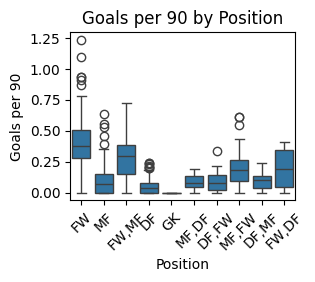

In [123]:


plt.subplot(2, 2, 1)
sns.boxplot(x='Pos', y='goals_per_90', data=df_leagues)
plt.xlabel('Position')
plt.ylabel('Goals per 90')
plt.title('Goals per 90 by Position')
plt.xticks(rotation=45)



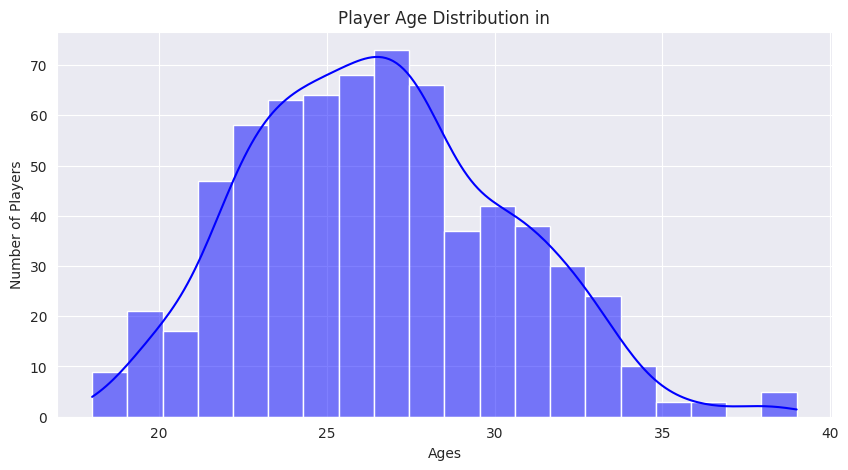

In [143]:

sns.set_style("darkgrid")
# Visualization of player age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_leagues["Age"], bins=20, kde=True, color="blue")
  #sns.boxplot(df_leagues["Age"])
plt.title("Player Age Distribution in")
plt.xlabel("Ages")
plt.ylabel("Number of Players")
plt.show()

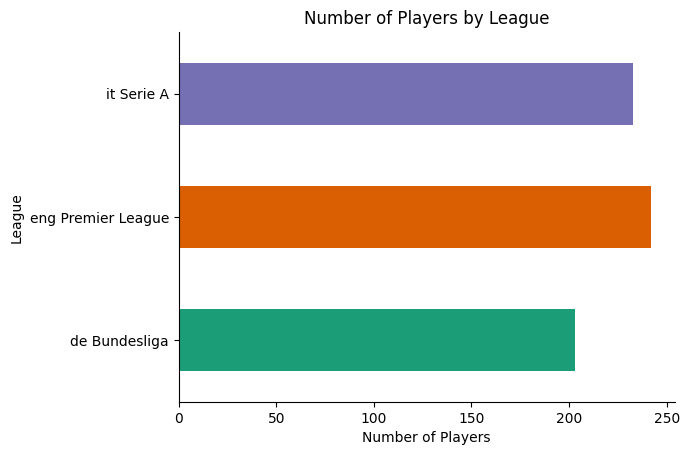

In [104]:
df_leagues.groupby('Comp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Number of Players')
plt.ylabel('League')
plt.title('Number of Players by League')
plt.show()

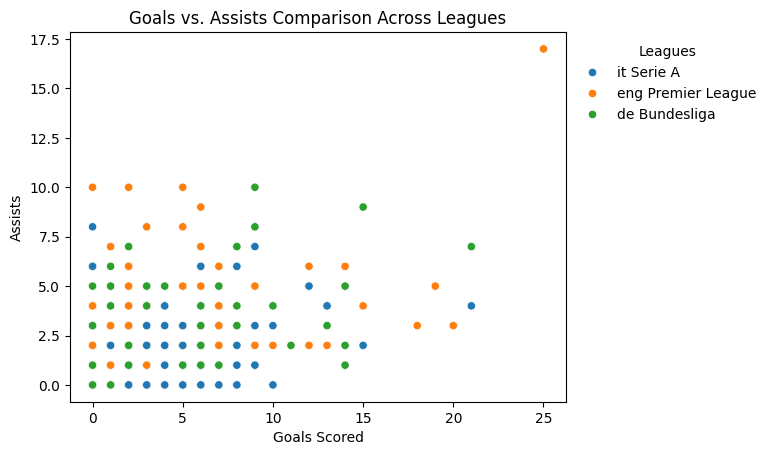

In [109]:
sns.scatterplot(data=df_leagues, x="Gls", y="Ast", hue="Comp")

plt.legend(title= 'Leagues',loc='upper left', bbox_to_anchor=(1, 1),frameon=False)

plt.xlabel("Goals Scored")
plt.ylabel("Assists")
plt.title("Goals vs. Assists Comparison Across Leagues")
plt.show()

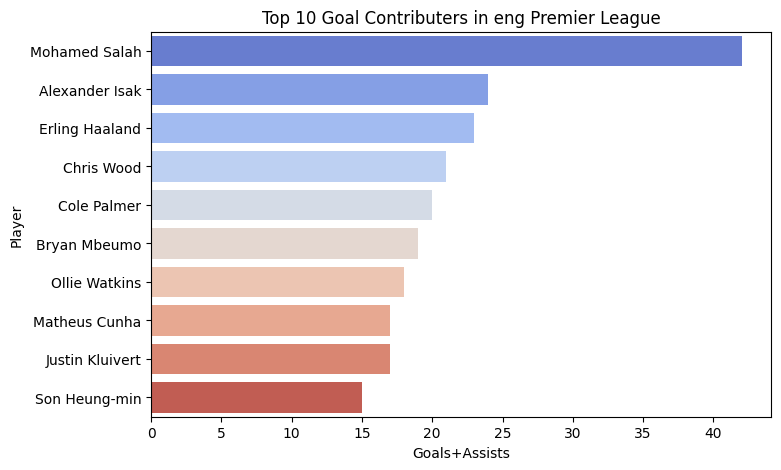

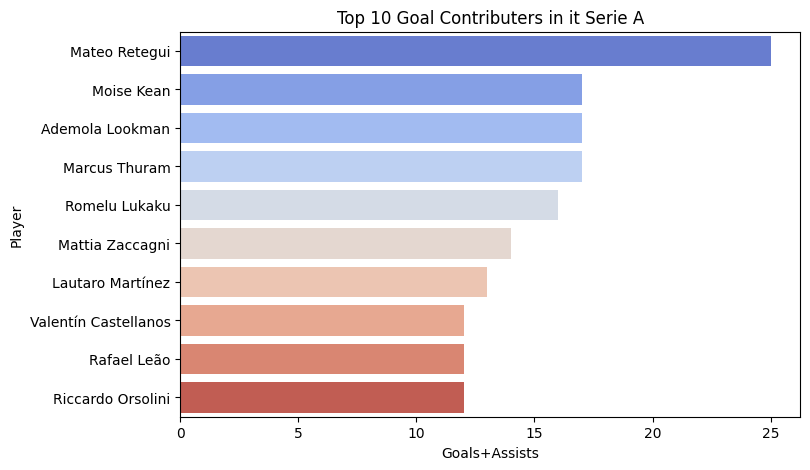

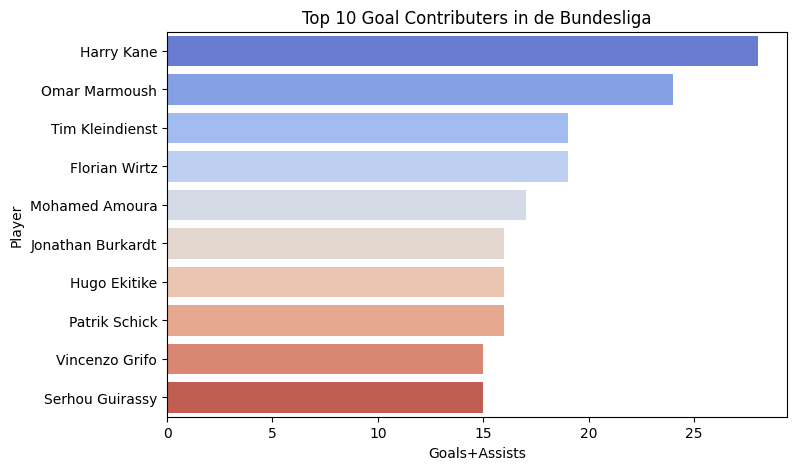

In [112]:
for league in leagues:
  top_scorer_assister = df[df["Comp"] == league].nlargest(10, "G+A")[["Player", "G+A"]]
  plt.figure(figsize=(8, 5))
  sns.barplot(y=top_scorer_assister["Player"], x=top_scorer_assister["G+A"],hue=top_scorer_assister["Player"], palette="coolwarm", legend= False)
  plt.xlabel("Goals+Assists")
  plt.ylabel("Player")
  plt.title(f"Top 10 Goal Contributers in {league}")
  plt.show()

In [113]:
import plotly.express as px

fig = px.scatter(df_leagues, x="Gls", y="Ast", color="Comp",
                 hover_data=['Player','Gls', 'Ast', 'Comp'])  # Show these values on hover

fig.update_layout(title="Goals vs. Assists Comparison Across Leagues",
                  xaxis_title="Goals Scored",
                  yaxis_title="Assists")

fig.show()

<ipython-input-114-e062c41b06e0>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




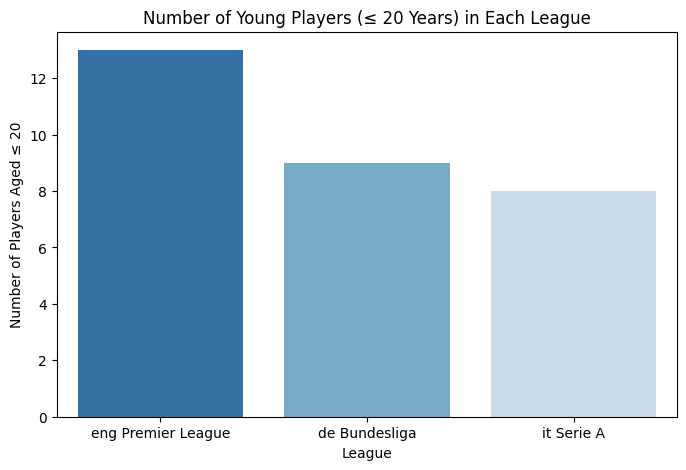

In [114]:
young_players = df_leagues[(df_leagues["Age"]<=20) & (df_leagues["Comp"].isin(leagues))]

young_players_count = young_players["Comp"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=young_players_count.index, y=young_players_count.values, palette="Blues_r")

# Labels and title
plt.xlabel("League")
plt.ylabel("Number of Players Aged ≤ 20")
plt.title("Number of Young Players (≤ 20 Years) in Each League")

# Show plot
plt.show()

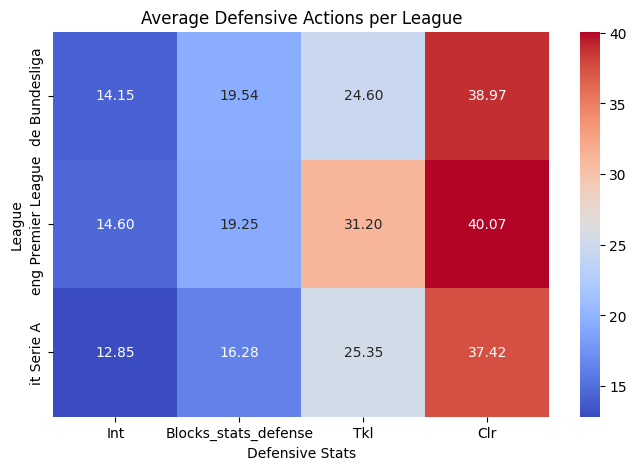

In [115]:
import numpy as np

# Selecting defensive stats
defensive_stats = df_leagues.groupby("Comp")[["Int", "Blocks_stats_defense", "Tkl", "Clr"]].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(defensive_stats, annot=True, cmap="coolwarm", fmt=".2f",xticklabels=True, yticklabels=True)

# Labels and title
plt.xlabel("Defensive Stats")
plt.ylabel("League")
plt.title("Average Defensive Actions per League")
plt.show()